# EXERCICIO6

In [3]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import six
from io import StringIO
import imageio

In [4]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
            
    return image


def showImageWithColors(image, n_colors):
    image = np.array(image, dtype=np.float64) / 255

    # Carrega a imagem e transforma num array 2D
    w,h,d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))
    
    print('Array 2D')
    print(image_array)

    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    # Get labels for all points
    print('Predição com array 2D (k-means)')
    labels = kmeans.predict(image_array)

    plt.figure(2)
    plt.clf()
    plt.axis('off')
    title = "Quantized image " + str(n_colors) +" colors, K-Means)"
    plt.title(title)
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [5]:
image_name="img2.jpg"

In [6]:
image = imageio.imread(image_name)

original_image=image

print(image)

[[[175 131 118]
  [175 131 118]
  [174 130 117]
  ...
  [201 180 177]
  [200 179 176]
  [199 178 175]]

 [[175 131 118]
  [175 131 118]
  [174 130 117]
  ...
  [200 179 176]
  [199 178 175]
  [199 178 175]]

 [[174 130 117]
  [174 130 117]
  [174 130 117]
  ...
  [199 178 175]
  [198 177 174]
  [198 177 174]]

 ...

 [[191 187 100]
  [201 196 114]
  [215 211 137]
  ...
  [166 185 192]
  [166 185 192]
  [166 185 192]]

 [[191 193 110]
  [203 206 127]
  [219 220 150]
  ...
  [165 184 191]
  [165 184 191]
  [165 184 191]]

 [[195 203 120]
  [208 215 138]
  [223 228 161]
  ...
  [164 183 190]
  [164 183 190]
  [164 183 190]]]


In [7]:
print(image.shape)

(400, 500, 3)


In [8]:
display.HTML('<img src="{}" height=20px style="height: 400px;">'.format("img2.jpg")) #To display the image

Array 2D
[[0.68627451 0.51372549 0.4627451 ]
 [0.68627451 0.51372549 0.4627451 ]
 [0.68235294 0.50980392 0.45882353]
 ...
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]]
Predição com array 2D (k-means)


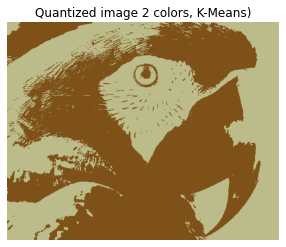

In [9]:
showImageWithColors(image,2)


Array 2D
[[0.68627451 0.51372549 0.4627451 ]
 [0.68627451 0.51372549 0.4627451 ]
 [0.68235294 0.50980392 0.45882353]
 ...
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]]
Predição com array 2D (k-means)


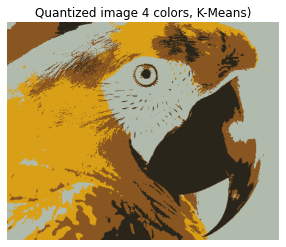

In [10]:
showImageWithColors(image,4)


Array 2D
[[0.68627451 0.51372549 0.4627451 ]
 [0.68627451 0.51372549 0.4627451 ]
 [0.68235294 0.50980392 0.45882353]
 ...
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]]
Predição com array 2D (k-means)


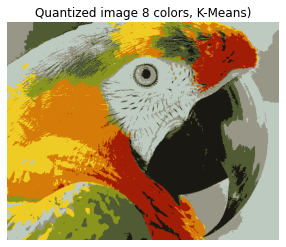

In [11]:
showImageWithColors(image,8)


Array 2D
[[0.68627451 0.51372549 0.4627451 ]
 [0.68627451 0.51372549 0.4627451 ]
 [0.68235294 0.50980392 0.45882353]
 ...
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]]
Predição com array 2D (k-means)


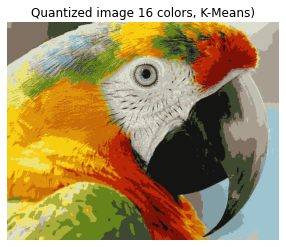

In [12]:
showImageWithColors(image,16)


**H. Se cada uma das 3 cores do RGB é representada por 1 byte (i.e., 8 bits) qual o
tamanho aproximado da imagem original e de cada uma das 4 imagens
quantizadas?**


In [13]:
width = 500
height = 400

bit_depth = 8

tamanho_imagem = (width * height * (bit_depth/8) * 3)

print('Tamanho da imagem Original é:', tamanho_imagem, 'Bytes')


bit_depth = 1

tamanho_imagem = (width * height * (bit_depth/8) * 3)
print('Tamanho da imagem Com duas cores é:', tamanho_imagem, 'Bytes')

bit_depth = 2

tamanho_imagem = (width * height * (bit_depth/8) * 3)
print('Tamanho da imagem Com quatro cores é:', tamanho_imagem, 'Bytes')


bit_depth = 3


tamanho_imagem = (width * height * (bit_depth/8) * 3)
print('Tamanho da imagem Com oito cores é:', tamanho_imagem, 'Bytes')

bit_depth = 4


tamanho_imagem = (width * height * (bit_depth/8) * 3)

print('Tamanho da imagem Com 16 cores é:', tamanho_imagem, 'Bytes')

Tamanho da imagem Original é: 600000.0 Bytes
Tamanho da imagem Com duas cores é: 75000.0 Bytes
Tamanho da imagem Com quatro cores é: 150000.0 Bytes
Tamanho da imagem Com oito cores é: 225000.0 Bytes
Tamanho da imagem Com 16 cores é: 300000.0 Bytes
